<a href="https://colab.research.google.com/github/vTheWise/speech_language_impairment_detection/blob/main/wav2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting the drive (optional) 
- Mount the drive if the data is stored in the google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installations

- Install all the required packages

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 109.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.1 MB/s eta 0:00:00


In [ ]:
!pip install librosa==0.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import the required packages

In [ ]:
from transformers import Wav2Vec2Processor, Wav2Vec2Model
import librosa

In [91]:
import torchaudio

In [4]:
from sklearn.neural_network import MLPClassifier

In [4]:
import torch

In [5]:
import pickle

In [6]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
import pandas as pd

# Constants & Configurations

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [18]:
labels = [0, 1]

In [11]:
auburn_disordered_filename = 'drive/MyDrive/MSAI/Practicum/slid_database/w2v_auburn_disordered.pkl'
auburn_non_disordered_filename = 'drive/MyDrive/MSAI/Practicum/slid_database/w2v_auburn_non_disordered.pkl'
cincinnati_disordered_filename = 'drive/MyDrive/MSAI/Practicum/slid_database/w2v_cincinnati_disordered.pkl'
cincinnati_non_disordered_filename = 'drive/MyDrive/MSAI/Practicum/slid_database/w2v_cincinnati_non_disordered.pkl'

# Data Loading

In [ ]:
def loadPickleData(filepath):
  data = pickle.load(open(filepath, 'rb'))
  return data

In [ ]:
# data paths
auburnDisorderedDataPath = "drive/MyDrive/MSAI/Practicum/slid_database/auburn_disordered.pkl"
auburnNonDisorderedDataPath = "drive/MyDrive/MSAI/Practicum/slid_database/auburn_non_disordered.pkl"
cincinnatiDisorderedDataPath = "drive/MyDrive/MSAI/Practicum/slid_database/cincinnati_disordered.pkl"
cincinnatiNonDisorderedDataPath = "drive/MyDrive/MSAI/Practicum/slid_database/cincinnati_non_disordered.pkl"

In [ ]:
# read disordered data
auburn_disordered = loadPickleData(auburnDisorderedDataPath)
print("auburn disordered data size " , len(auburn_disordered))

cincinnati_disordered = loadPickleData(cincinnatiDisorderedDataPath)
print("cincinnati disordered data size " , len(cincinnati_disordered))


# read non disordered data
auburn_non_disordered = loadPickleData(auburnNonDisorderedDataPath)
print("auburn non-disordered data size " , len(auburn_non_disordered))

cincinnati_non_disordered = loadPickleData(cincinnatiNonDisorderedDataPath)
print("cincinnati non-disordered data size " , len(cincinnati_non_disordered))

auburn disordered data size  2022
cincinnati disordered data size  433
auburn non-disordered data size  5938
cincinnati non-disordered data size  2008


# Extract Features using Wav2Vec

In [ ]:
# load model
processor = Wav2Vec2Processor.from_pretrained(
    "facebook/wav2vec2-large-robust-ft-swbd-300h")
model = Wav2Vec2Model.from_pretrained(
    "facebook/wav2vec2-large-robust-ft-swbd-300h").to(device)

Some weights of the model checkpoint at facebook/wav2vec2-large-robust-ft-swbd-300h were not used when initializing Wav2Vec2Model: ['lm_head.bias', 'lm_head.weight']
- This IS expected if you are initializing Wav2Vec2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def extract_features(data):
  output = []
  for d in data:
    # speech, rate = librosa.load("target1.wav")
    input = processor(d.squeeze(), sampling_rate=16000, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**input.to(device))

    last_hidden_states = outputs.last_hidden_state.squeeze().mean(axis=0).cpu().numpy()
    output.append(last_hidden_states)
  return output

In [ ]:
# audio file is decoded on the fly
auburn_disordered_features = extract_features(auburn_disordered)

In [ ]:
auburn_non_disordered_features = extract_features(auburn_non_disordered)

In [ ]:
cincinnati_disordered_features = extract_features(cincinnati_disordered)

In [ ]:
cincinnati_non_disordered_features = extract_features(cincinnati_non_disordered)

# Save the features

In [ ]:
def pickleData(filename, data):
  with open(filename, 'wb') as f:
    pickle.dump(data, f)
    f.close()

In [ ]:
pickleData(auburn_disordered_filename, auburn_disordered_features)
pickleData(auburn_non_disordered_filename, auburn_non_disordered_features)
pickleData(cincinnati_disordered_filename, cincinnati_disordered_features)
pickleData(cincinnati_non_disordered_filename, cincinnati_non_disordered_features)

#Read pickled files and convert into dataframes

In [10]:
def loadPickleData(filepath):
  data = pickle.load(open(filepath, 'rb'))
  return data

In [12]:
auburn_disordered_features_pkl = loadPickleData(auburn_disordered_filename)
auburn_non_disordered_features_pkl = loadPickleData(auburn_non_disordered_filename)
cincinnati_disordered_features_pkl = loadPickleData(cincinnati_disordered_filename)
cincinnati_non_disordered_features_pkl = loadPickleData(cincinnati_non_disordered_filename)

In [13]:
combined_disordered_features = auburn_disordered_features_pkl + cincinnati_disordered_features_pkl
combined_non_disordered_features = auburn_non_disordered_features_pkl + cincinnati_non_disordered_features_pkl

In [14]:
len(combined_non_disordered_features)

7946

In [15]:
len(combined_disordered_features)

2455

In [19]:
df_non_disordered_features = pd.DataFrame(combined_non_disordered_features)
df_non_disordered_features['label'] = labels[0]
df_non_disordered_features.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,0.039734,0.048435,0.067487,-0.010172,0.009827,-0.077144,0.399569,0.029180,0.019079,-0.034691,...,0.036644,0.275513,0.116643,0.036950,-0.932953,0.055748,-0.026000,-0.050920,-0.009131,0
1,0.044635,0.046752,0.060130,0.002178,-0.008075,-0.068763,0.522563,-0.023723,-0.008114,-0.039838,...,0.065995,0.097780,0.062342,0.038205,-0.623080,-0.277188,-0.026682,-0.065354,-0.026255,0
2,0.043567,0.053394,0.069707,0.001846,-0.024712,-0.024587,0.212642,-0.020668,0.054299,-0.039508,...,0.042750,0.072257,0.089250,0.066947,-0.885036,-0.162534,-0.029763,-0.034787,-0.007640,0
3,0.042739,0.051288,0.076073,-0.014046,-0.015727,-0.063098,0.153678,0.012405,0.095684,-0.058166,...,0.072373,0.177493,0.071616,0.081802,-0.851760,-0.085139,-0.037107,-0.039172,-0.016156,0
4,0.043826,0.055863,0.054430,-0.005933,-0.000455,-0.049939,0.301171,-0.037318,0.132312,-0.038711,...,0.069045,0.067252,0.036167,0.126889,-0.781480,0.007364,-0.038496,-0.064791,-0.006959,0


In [20]:
df_disordered_features = pd.DataFrame(combined_disordered_features)
df_disordered_features['label'] = labels[1]
df_disordered_features.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,0.037373,0.056709,0.072487,-0.023547,0.007546,-0.055679,0.309755,0.012766,0.100616,-0.053669,...,0.042172,0.167338,0.114146,-0.059775,-0.702920,0.027936,-0.005987,-0.054552,0.013498,1
1,0.038948,0.071314,0.086376,-0.042646,0.005977,-0.109305,0.131993,0.000469,0.003212,-0.054235,...,0.091310,0.047840,0.084688,0.037628,-0.610910,0.018558,-0.011674,-0.034715,-0.009870,1
2,0.038204,0.070645,0.086711,-0.027478,-0.008479,-0.108785,0.465069,-0.009751,0.012133,-0.062568,...,0.092904,0.154206,0.082252,0.033229,-0.531971,0.034827,0.002519,-0.045667,0.000654,1
3,0.037181,0.064960,0.079436,-0.020334,0.015927,-0.030770,0.512674,0.014065,0.097534,-0.004835,...,0.055716,0.272712,0.098889,-0.023326,-0.486841,0.097826,-0.019308,-0.033877,0.004170,1
4,0.036092,0.062733,0.079132,-0.022899,0.013834,-0.092958,0.571351,0.029331,0.156840,-0.060186,...,0.075591,0.223992,0.097246,0.018117,-0.539482,0.018661,-0.007224,-0.060648,-0.001386,1


In [21]:
frames = [df_non_disordered_features, df_disordered_features]
df_combined = pd.concat(frames)

# test-train split for finetuning

In [22]:
# set input and target variable
X = df_combined.loc[:, df_combined.columns != 'label']
y = df_combined['label']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\ntraining dataset size", len(X_train))
print("\ntest dataset size", len(X_test))


training dataset size 8320

test dataset size 2081


# Use Wav2Vec features for classification

## MLP

In [34]:
# define classifier
mlp = MLPClassifier()

# train classifier
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [35]:
y_pred_mlp = mlp.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1578
           1       0.70      0.52      0.60       503

    accuracy                           0.83      2081
   macro avg       0.78      0.73      0.75      2081
weighted avg       0.82      0.83      0.82      2081



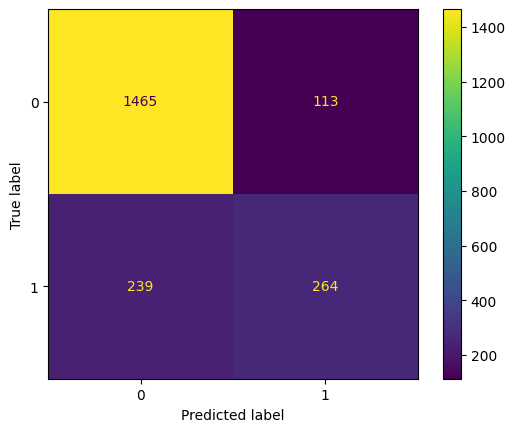

In [37]:
cm = confusion_matrix(y_test, y_pred_mlp, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()